In [58]:
import streamlit as st
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import os


In [59]:
print('working on it....')


file_path = "C://Users//gichu//Downloads//metadata//metadata.csv"
# Check if file exists first
if os.path.exists(file_path):
    df = pd.read_csv(file_path,low_memory=False)   
    df_sample = df.sample(n=5000, random_state=42)
    print(f"Original size: {len(df)}")
    print(f"Sample size: {len(df_sample)}")
    print("Sample preview:")
    print(df_sample.head())
else:
    print(f"Error: File not found at {file_path}")


print("data loaded successfully")

    

working on it....
Original size: 1056660
Sample size: 5000
Sample preview:
        cord_uid                                       sha  source_x  \
17948   ak20jg32  42a61efa32fae8fb14d1c8c1a8bc528c59e1583a       PMC   
915932  d27cnei3                                       NaN  PMC; WHO   
456857  7fo988o7                                       NaN       WHO   
176672  vcz81w3o                                       NaN   Medline   
40038   3ewr26np                                       NaN       PMC   

                                                    title  \
17948   Development and Internal Validation of a Novel...   
915932  mRNA-1273: Acute disseminated encephalomyeliti...   
456857  The Joint Commission should reconsider its pos...   
176672  Flattening the Curve of Prostate Cancer Progre...   
40038        Vincristine: Various toxicities: case report   

                                 doi       pmcid pubmed_id license  \
17948      10.3389/fpsyt.2021.593710  PMC8172985  34093

In [41]:
df.describe()

,mag_id,s2_id
count,0.0,9.764680e+05
mean,NaN,2.175871e+08
std,NaN,5.312281e+07
min,NaN,9.600000e+01
25%,NaN,2.211411e+08
50%,NaN,2.320829e+08
75%,NaN,2.373948e+08
max,NaN,2.491936e+08


In [40]:
print("first 5 rows of the dataset")
df.head()

first 5 rows of the dataset


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [60]:
print("The last 5 rows of the dataset")
df.tail()

The last 5 rows of the dataset


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
1056655,aeuy92bx,d86cfba423427426c10fa9092748733f5c7ca7e0; a8e5...,BioRxiv; MedRxiv; WHO,Potent neutralization of 2019 novel coronaviru...,10.1101/2020.02.01.929976,NaN,NaN,medrxiv,"2019-nCoV, which is a novel coronavirus emerge...",2020-02-02,"Lei, Changhai; Fu, Wenyan; Qian, Kewen; Li, Ti...",bioRxiv,NaN,NaN,NaN,document_parses/pdf_json/d86cfba423427426c10fa...,NaN,https://doi.org/10.1101/2020.02.01.929976,211121242.0
1056656,n8hlrknq,b98985f125c3391aac709332e6380fe8b11ef6e5,Elsevier; Medline; PMC,"Molecular-based diagnostics, including future ...",10.1016/j.mpmed.2013.08.012,PMC7108438,32288574,no-cc,Microbiology laboratories have traditionally r...,2013-10-28,"Goldenberg, Simon",Medicine (Abingdon),NaN,NaN,NaN,document_parses/pdf_json/b98985f125c3391aac709...,document_parses/pmc_json/PMC7108438.xml.json,https://api.elsevier.com/content/article/pii/S...,214756712.0
1056657,05dxn54t,0d1698212a1fcbbed2ffff38953397b3fb82f30d,Medline; PMC,A Patient With Bilateral Conjunctivitis Positi...,10.1097/ico.0000000000002485,PMC7446980,32794685,no-cc,To present a patient with bilateral conjunctiv...,2020-07-02,"Sirakaya, Ender; Sahiner, Mustafa; Aslan Sirak...",Cornea,NaN,NaN,NaN,document_parses/pdf_json/0d1698212a1fcbbed2fff...,document_parses/pmc_json/PMC7446980.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/32794685/;...,221122247.0
1056658,zpeij14g,9b2bbb5ceb21084931b5de7e0d60633e524a20bb,Medline; PMC,Incidental lowering of otitis-media complaints...,10.1007/s00431-020-03747-9,PMC7370867,32691131,no-cc,Given COVID-19 pandemic periodic outpatient as...,2020-07-20,"Torretta, Sara; Capaccio, Pasquale; Coro, Ilar...",Eur J Pediatr,NaN,NaN,NaN,document_parses/pdf_json/9b2bbb5ceb21084931b5d...,document_parses/pmc_json/PMC7370867.xml.json,https://doi.org/10.1007/s00431-020-03747-9; ht...,220647629.0
1056659,pq54lvya,c7ae1a19b70e6e2806b670e4c0f64d3043698ee1,Medline; PMC,Hospital variation in admissions to neonatal i...,10.1038/s41372-020-00775-z,PMC7427695,32801351,no-cc,OBJECTIVE: To examine interhospital variation ...,2020-08-14,"Haidari, Eman S.; Lee, Henry C.; Illuzzi, Jess...",J Perinatol,NaN,NaN,NaN,document_parses/pdf_json/c7ae1a19b70e6e2806b67...,document_parses/pmc_json/PMC7427695.xml.json,https://doi.org/10.1038/s41372-020-00775-z; ht...,221129148.0


In [38]:
print("View column names:")
df.columns.tolist()

View column names:


['cord_uid',
 'sha',
 'source_x',
 'title',
 'doi',
 'pmcid',
 'pubmed_id',
 'license',
 'abstract',
 'publish_time',
 'authors',
 'journal',
 'mag_id',
 'who_covidence_id',
 'arxiv_id',
 'pdf_json_files',
 'pmc_json_files',
 'url',
 's2_id']

In [61]:
print("printing Data types for each column")
df.dtypes

printing Data types for each column


cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object

In [36]:
print("Count of colums by data type:")
df.dtypes.value_counts()

Count of colums by data type:


object     17
float64     2
Name: count, dtype: int64

In [42]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Missing values per column:")
missing_info = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage
})
print(missing_info.sort_values('Missing_Count', ascending=False))

high_missing = missing_percentage[missing_percentage > 50]
print(f"\nColumns with more than 50% missing values: {len(high_missing)}")
print(high_missing)


Missing values per column:
                  Missing_Count  Missing_Percentage
mag_id                  1056660          100.000000
arxiv_id                1042411           98.651506
pmc_json_files           740918           70.118865
sha                      682894           64.627600
pdf_json_files           682894           64.627600
pmcid                    667089           63.131849
who_covidence_id         573725           54.296084
pubmed_id                557728           52.782163
doi                      399880           37.843772
url                      369726           34.990063
abstract                 235544           22.291371
journal                   87322            8.263964
s2_id                     80192            7.589196
authors                   23869            2.258910
publish_time               1814            0.171673
title                       503            0.047603
cord_uid                      0            0.000000
source_x                      0      

In [47]:
print("="*60)
print("STEP 1: Detailed Missing Values Analysis")
print("="*60)

# Calculate missing values
missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df)) * 100

# Create a detailed missing values report
missing_summary = pd.DataFrame({
    'Missing_Count': missing_count,
    'Missing_Percentage': missing_pct,
    'Data_Type': df.dtypes
}).sort_values('Missing_Percentage', ascending=False)

print("Missing values summary (sorted by percentage):")
print(missing_summary)

# Categorize columns by missing value severity
print("\n" + "-"*40)
print("Missing Value Categories:")
print("-"*40)

low_missing = missing_pct[missing_pct < 10]
medium_missing = missing_pct[(missing_pct >= 10) & (missing_pct < 50)]
high_missing = missing_pct[missing_pct >= 50]

print(f"Columns with <10% missing: {len(low_missing)}")
print(f"Columns with 10-50% missing: {len(medium_missing)}")
print(f"Columns with ≥50% missing: {len(high_missing)}")

if len(high_missing) > 0:
    print(f"\nColumns with ≥50% missing (consider dropping):")
    for col in high_missing.index:
        print(f"  - {col}: {high_missing[col]:.1f}% missing")

STEP 1: Detailed Missing Values Analysis
Missing values summary (sorted by percentage):
                  Missing_Count  Missing_Percentage Data_Type
mag_id                  1056660          100.000000   float64
arxiv_id                1042411           98.651506    object
pmc_json_files           740918           70.118865    object
sha                      682894           64.627600    object
pdf_json_files           682894           64.627600    object
pmcid                    667089           63.131849    object
who_covidence_id         573725           54.296084    object
pubmed_id                557728           52.782163    object
doi                      399880           37.843772    object
url                      369726           34.990063    object
abstract                 235544           22.291371    object
journal                   87322            8.263964    object
s2_id                     80192            7.589196   float64
authors                   23869            2

In [48]:
#PART 2
print("\n" + "="*60)
print("STEP 2: Handling Missing Values")
print("="*60)

# Create a copy for cleaning
df_clean = df.copy()
original_rows = len(df_clean)

print("Initial handling strategy:")

# Strategy for high missing columns (≥50%)
if len(high_missing) > 0:
    cols_to_drop = high_missing.index.tolist()
    print(f"Dropping columns with ≥50% missing: {cols_to_drop}")
    df_clean = df_clean.drop(columns=cols_to_drop)
else:
    print("No columns with ≥50% missing found.")

# Strategy for medium missing columns (10-50%)
if len(medium_missing) > 0:
    print(f"\nColumns with 10-50% missing (needs careful handling):")
    for col in medium_missing.index:
        if col in df_clean.columns:  # Check if column wasn't dropped
            print(f"  - {col}: {medium_missing[col]:.1f}% missing")
            
            # Different strategies based on data type
            if df_clean[col].dtype == 'object':
                # For categorical/text data, fill with 'Unknown' or mode
                mode_value = df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown'
                df_clean[col] = df_clean[col].fillna(mode_value)
                print(f"    Filled with mode: '{mode_value}'")
            else:
                # For numerical data, fill with median
                median_value = df_clean[col].median()
                df_clean[col] = df_clean[col].fillna(median_value)
                print(f"    Filled with median: {median_value}")

# Strategy for low missing columns (<10%)
if len(low_missing) > 0:
    # For critical columns, we might want to drop rows with missing values
    critical_columns = ['title', 'abstract', 'publish_time']  # Adjust based on your dataset
    
    print(f"\nCritical columns (will drop rows with missing values):")
    for col in critical_columns:
        if col in df_clean.columns and missing_pct[col] < 10:
            before = len(df_clean)
            df_clean = df_clean.dropna(subset=[col])
            after = len(df_clean)
            print(f"  - {col}: Dropped {before - after} rows")

print(f"\nRows after cleaning: {len(df_clean)}/{original_rows} ({len(df_clean)/original_rows*100:.1f}% retained)")


STEP 2: Handling Missing Values
Initial handling strategy:
Dropping columns with ≥50% missing: ['sha', 'pmcid', 'pubmed_id', 'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files']

Columns with 10-50% missing (needs careful handling):
  - doi: 37.8% missing
    Filled with mode: '10.1016/j.scitotenv.2020.139397'
  - abstract: 22.3% missing
    Filled with mode: '[Figure: see text].'
  - url: 35.0% missing
    Filled with mode: 'http://ajp.amjpathol.org/article/S0002944010613296/pdf; https://www.ncbi.nlm.nih.gov/pubmed/17392154/; https://www.sciencedirect.com/science/article/pii/S0002944010613296; https://api.elsevier.com/content/article/pii/S0002944010613296'

Critical columns (will drop rows with missing values):
  - title: Dropped 503 rows
  - publish_time: Dropped 1814 rows

Rows after cleaning: 1054343/1056660 (99.8% retained)


In [49]:
print("\n" + "="*60)
print("STEP 3: Date Processing")
print("="*60)

# Identify potential date columns (common in CORD-19)
date_columns = []
for col in df_clean.columns:
    col_lower = col.lower()
    if any(keyword in col_lower for keyword in ['date', 'time', 'year', 'publish']):
        date_columns.append(col)

print(f"Potential date columns: {date_columns}")

# Try to convert date columns
for col in date_columns:
    if col in df_clean.columns:
        print(f"Processing {col}:")
        print(f"  Original dtype: {df_clean[col].dtype}")
        print(f"  Sample values: {df_clean[col].head(3).tolist()}")
        
        # Try to convert to datetime
        try:
            df_clean[f'{col}_datetime'] = pd.to_datetime(df_clean[col], errors='coerce')
            successful_conversions = df_clean[f'{col}_datetime'].notna().sum()
            print(f"Successfully converted: {successful_conversions}/{len(df_clean)} rows")
            
            # Extract year if conversion successful
            if successful_conversions > 0:
                df_clean[f'{col}_year'] = df_clean[f'{col}_datetime'].dt.year
                print(f"  Year extracted for time-based analysis")
                
                # Basic year statistics
                valid_years = df_clean[f'{col}_year'].dropna()
                if len(valid_years) > 0:
                    print(f"  Year range: {int(valid_years.min())} - {int(valid_years.max())}")
        except Exception as e:
            print(f"Error converting {col}: {e}")


STEP 3: Date Processing
Potential date columns: ['publish_time']
Processing publish_time:
  Original dtype: object
  Sample values: ['2001-07-04', '2000-08-15', '2000-08-25']
Successfully converted: 518429/1054343 rows
  Year extracted for time-based analysis
  Year range: 1856 - 2024


In [50]:
print("\n" + "="*60)
print("STEP 4: Creating New Columns")
print("="*60)

# 1. Abstract word count
if 'abstract' in df_clean.columns:
    df_clean['abstract_word_count'] = df_clean['abstract'].apply(
        lambda x: len(str(x).split()) if pd.notna(x) else 0
    )
    print(f" Created 'abstract_word_count'")
    print(f"  Average word count: {df_clean['abstract_word_count'].mean():.1f}")
    print(f"  Max word count: {df_clean['abstract_word_count'].max()}")

# 2. Title word count
if 'title' in df_clean.columns:
    df_clean['title_word_count'] = df_clean['title'].apply(
        lambda x: len(str(x).split()) if pd.notna(x) else 0
    )
    print(f"Created 'title_word_count'")

# 3. Has abstract indicator
if 'abstract' in df_clean.columns:
    df_clean['has_abstract'] = df_clean['abstract'].notna()
    abstract_count = df_clean['has_abstract'].sum()
    print(f" Created 'has_abstract' indicator")
    print(f"  Papers with abstract: {abstract_count}/{len(df_clean)} ({abstract_count/len(df_clean)*100:.1f}%)")

# 4. Author count (if authors column exists)
if 'authors' in df_clean.columns:
    df_clean['author_count'] = df_clean['authors'].apply(
        lambda x: len(str(x).split(';')) if pd.notna(x) else 0
    )
    print(f" Created 'author_count'")
    print(f"  Average authors per paper: {df_clean['author_count'].mean():.1f}")

# 5. Create a text length category
if 'abstract_word_count' in df_clean.columns:
    df_clean['abstract_length_category'] = pd.cut(
        df_clean['abstract_word_count'],
        bins=[0, 100, 300, 1000, float('inf')],
        labels=['Very Short', 'Short', 'Medium', 'Long']
    )
    print(f"Created 'abstract_length_category'")
    print("  Distribution:")
    print(df_clean['abstract_length_category'].value_counts())


STEP 4: Creating New Columns
 Created 'abstract_word_count'
  Average word count: 165.3
  Max word count: 18000
Created 'title_word_count'
 Created 'has_abstract' indicator
  Papers with abstract: 1054343/1054343 (100.0%)
 Created 'author_count'
  Average authors per paper: 5.6
Created 'abstract_length_category'
  Distribution:
abstract_length_category
Short         636787
Very Short    315006
Medium        102227
Long             323
Name: count, dtype: int64


In [51]:
print("\n" + "="*60)
print("STEP 5: Final Data Quality Check")
print("="*60)

print("Final dataset shape:", df_clean.shape)
print("\nMissing values in cleaned dataset:")
missing_clean = df_clean.isnull().sum()
missing_clean_pct = (missing_clean / len(df_clean)) * 100

missing_report = pd.DataFrame({
    'Missing_Count': missing_clean,
    'Missing_Percentage': missing_clean_pct
}).sort_values('Missing_Percentage', ascending=False)

# Only show columns that still have missing values
missing_report = missing_report[missing_report['Missing_Count'] > 0]

if len(missing_report) > 0:
    print(missing_report)
else:
    print(" No missing values remaining!")

print(f"\nData types in cleaned dataset:")
print(df_clean.dtypes.value_counts())

print(f"\nMemory usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


STEP 5: Final Data Quality Check
Final dataset shape: (1054343, 18)

Missing values in cleaned dataset:
                       Missing_Count  Missing_Percentage
publish_time_datetime         535914           50.829189
publish_time_year             535914           50.829189
journal                        85650            8.123542
s2_id                          80189            7.605589
authors                        23784            2.255812

Data types in cleaned dataset:
object            10
int64              3
float64            2
datetime64[ns]     1
bool               1
category           1
Name: count, dtype: int64

Memory usage: 2591.30 MB


In [52]:
print("\n" + "="*60)
print("STEP 6: Save Cleaned Dataset")
print("="*60)

# Save the cleaned dataset
output_path = "C://Users//gichu//Downloads//metadata//metadata_cleaned.csv"
df_clean.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")
print(f"Original size: {df.shape} → Cleaned size: {df_clean.shape}")
print(f" Columns reduced: {df.shape[1]} → {df_clean.shape[1]}")
print(f" Rows retained: {len(df_clean)}/{len(df)} ({len(df_clean)/len(df)*100:.1f}%)")

print("\n" + "="*60)
print("CLEANING COMPLETED SUCCESSFULLY! 🎉")
print("="*60)


STEP 6: Save Cleaned Dataset
Cleaned dataset saved to: C://Users//gichu//Downloads//metadata//metadata_cleaned.csv
Original size: (1056660, 19) → Cleaned size: (1054343, 18)
 Columns reduced: 19 → 18
 Rows retained: 1054343/1056660 (99.8%)

CLEANING COMPLETED SUCCESSFULLY! 🎉


In [62]:
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("=== Part 3: Data Analysis and Visualization ===\n")

# Load the cleaned dataset
file_path = "C://Users//gichu//Downloads//metadata//metadata_cleaned.csv"
df = pd.read_csv(file_path)
print(" Cleaned data loaded successfully!")
print(f"Dataset shape: {df.shape}\n")

=== Part 3: Data Analysis and Visualization ===

 Cleaned data loaded successfully!
Dataset shape: (1054343, 18)



In [63]:
print("="*60)
print("STEP 1: Basic Analysis")
print("="*60)

# 1.1 Count papers by publication year
print("1. Publications by Year:")
# Find the best year column (adjust based on your date columns)
year_columns = [col for col in df.columns if 'year' in col.lower()]
if year_columns:
    year_col = year_columns[0]  # Use the first year column found
    publications_by_year = df[year_col].value_counts().sort_index()
    print("Yearly publications:")
    for year, count in publications_by_year.head(10).items():
        print(f"  {int(year)}: {count:,} papers")
else:
    print("No year column found. Creating year from available date columns...")
    # Try to find any date column and extract year
    date_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in ['date', 'time'])]
    if date_columns:
        for col in date_columns:
            try:
                df['year'] = pd.to_datetime(df[col]).dt.year
                publications_by_year = df['year'].value_counts().sort_index()
                print("Yearly publications:")
                for year, count in publications_by_year.head(10).items():
                    print(f"  {int(year)}: {count:,} papers")
                break
            except:
                continue

# 1.2 Identify top journals
print("\n2. Top Journals:")
journal_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in ['journal', 'source', 'publisher'])]
if journal_columns:
    journal_col = journal_columns[0]
    top_journals = df[journal_col].value_counts().head(15)
    print("Top 15 journals:")
    for journal, count in top_journals.items():
        print(f"  {journal}: {count:,} papers")
else:
    print("No journal column found in the dataset")

# 1.3 Most frequent words in titles
print("\n3. Most Frequent Words in Titles:")
if 'title' in df.columns:
    # Combine all titles and clean text
    all_titles = ' '.join(df['title'].dropna().astype(str))
    
    # Clean text: remove punctuation, numbers, and convert to lowercase
    words = re.findall(r'\b[a-zA-Z]{3,}\b', all_titles.lower())  # Words with 3+ letters
    
    # Remove common stop words
    stop_words = {'the', 'and', 'of', 'in', 'to', 'a', 'for', 'with', 'on', 'by', 
                  'from', 'as', 'an', 'at', 'this', 'that', 'these', 'those', 'is',
                  'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do',
                  'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might',
                  'can', 'must', 'about', 'based', 'using', 'study', 'analysis',
                  'effect', 'effects', 'impact', 'impacts', 'review', 'model',
                  'models', 'method', 'methods', 'approach', 'approaches'}
    
    filtered_words = [word for word in words if word not in stop_words]
    
    # Get word frequencies
    word_freq = Counter(filtered_words)
    top_words = word_freq.most_common(20)
    
    print("Top 20 words in titles:")
    for word, count in top_words:
        print(f"  {word}: {count:,}")
else:
    print("No title column found")

STEP 1: Basic Analysis
1. Publications by Year:
Yearly publications:
  1856: 3 papers
  1857: 1 papers
  1860: 2 papers
  1864: 1 papers
  1876: 1 papers
  1878: 1 papers
  1879: 1 papers
  1900: 1 papers
  1902: 1 papers
  1903: 1 papers

2. Top Journals:
Top 15 journals:
  WHO: 448,645 papers
  Medline; PMC: 150,592 papers
  Medline: 131,110 papers
  PMC: 80,189 papers
  Medline; PMC; WHO: 65,968 papers
  Elsevier; Medline; PMC: 49,314 papers
  Medline; WHO: 43,855 papers
  Elsevier; Medline; PMC; WHO: 19,793 papers
  MedRxiv; WHO: 13,756 papers
  ArXiv: 13,176 papers
  Elsevier; PMC: 8,550 papers
  Elsevier; PMC; WHO: 6,593 papers
  PMC; WHO: 6,136 papers
  MedRxiv: 4,754 papers
  BioRxiv; WHO: 3,746 papers

3. Most Frequent Words in Titles:
Top 20 words in titles:
  covid: 493,654
  pandemic: 140,018
  during: 115,404
  sars: 105,611
  cov: 100,299
  patients: 96,620
  health: 66,803
  coronavirus: 57,589
  disease: 56,403
  infection: 47,984
  care: 46,321
  clinical: 37,252
  cas


STEP 2: Creating Visualizations


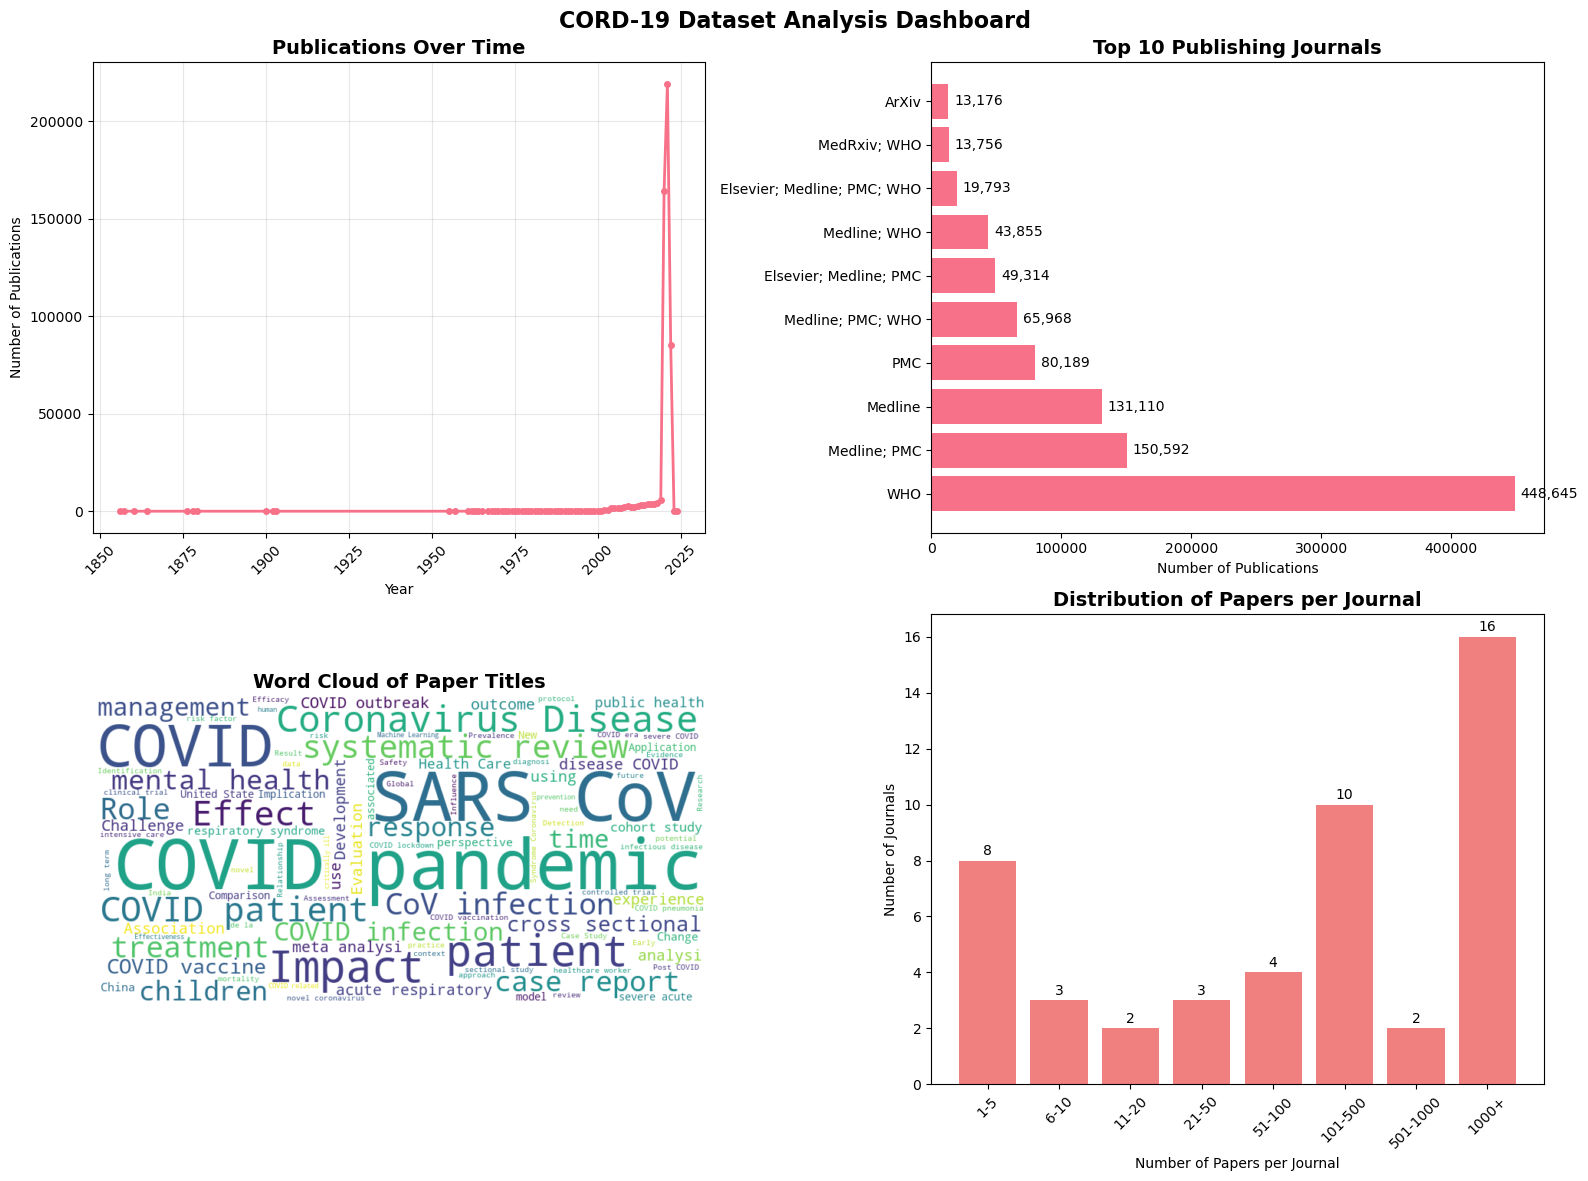

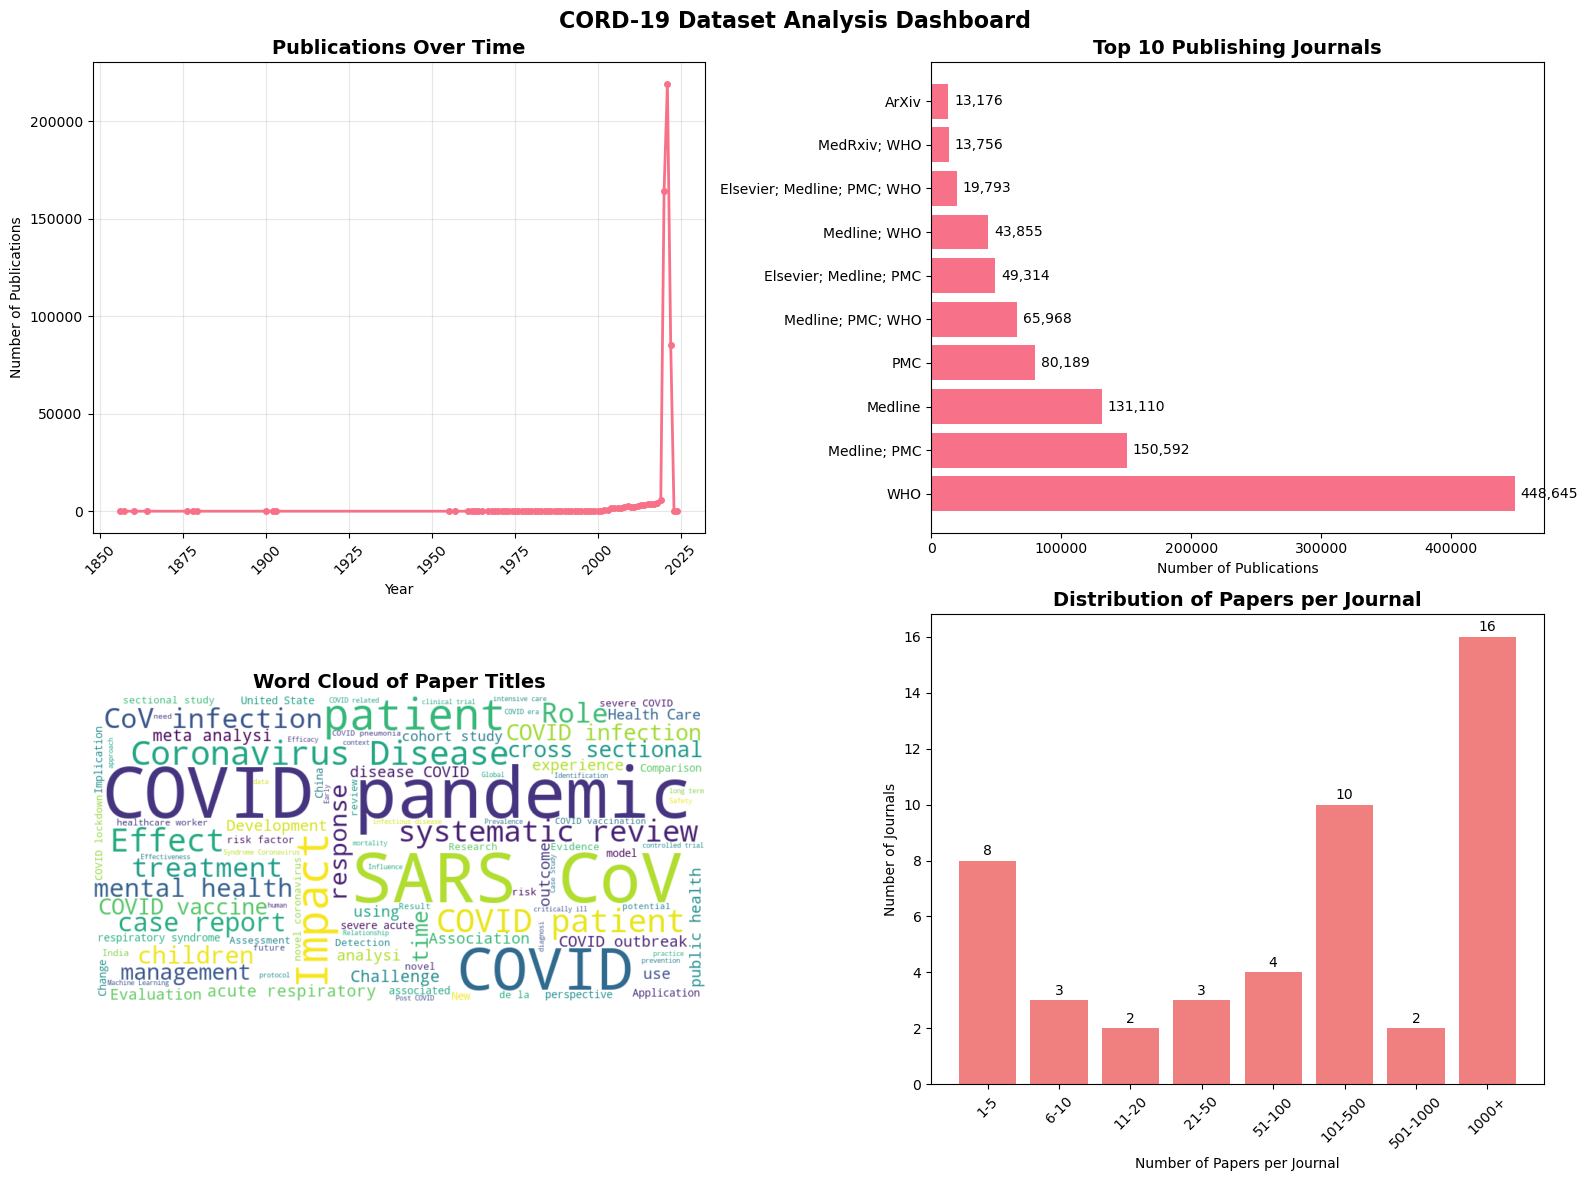

In [65]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

print("\n" + "="*60)
print("STEP 2: Creating Visualizations")
print("="*60)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('CORD-19 Dataset Analysis Dashboard', fontsize=16, fontweight='bold')

# 2.1 Plot publications over time
if 'year_col' in locals() and year_col in df.columns:
    ax1 = axes[0, 0]
    yearly_data = df[year_col].value_counts().sort_index()
    yearly_data = yearly_data[yearly_data.index.notna()]  # Remove NaN years
    
    ax1.plot(yearly_data.index, yearly_data.values, marker='o', linewidth=2, markersize=4)
    ax1.set_title('Publications Over Time', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Publications')
    ax1.grid(True, alpha=0.3)
    
    # Rotate x-axis labels for better readability
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
else:
    axes[0, 0].text(0.5, 0.5, 'No year data available', ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('Publications Over Time (No Data)', fontsize=14)

# 2.2 Bar chart of top journals
if journal_columns and journal_col in df.columns:
    ax2 = axes[0, 1]
    top_10_journals = df[journal_col].value_counts().head(10)
    
    bars = ax2.barh(range(len(top_10_journals)), top_10_journals.values)
    ax2.set_yticks(range(len(top_10_journals)))
    ax2.set_yticklabels([journal[:40] + '...' if len(journal) > 40 else journal 
                        for journal in top_10_journals.index])
    ax2.set_title('Top 10 Publishing Journals', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Number of Publications')
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(width + max(top_10_journals.values)*0.01, bar.get_y() + bar.get_height()/2, 
                f'{int(width):,}', ha='left', va='center')
else:
    axes[0, 1].text(0.5, 0.5, 'No journal data available', ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Top Journals (No Data)', fontsize=14)

# 2.3 Word cloud of paper titles
if 'title' in df.columns:
    ax3 = axes[1, 0]
    
    # Prepare text for word cloud
    text = ' '.join(df['title'].dropna().astype(str))
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                         max_words=100, colormap='viridis').generate(text)
    
    ax3.imshow(wordcloud, interpolation='bilinear')
    ax3.set_title('Word Cloud of Paper Titles', fontsize=14, fontweight='bold')
    ax3.axis('off')
else:
    axes[1, 0].text(0.5, 0.5, 'No title data available', ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Word Cloud (No Data)', fontsize=14)

# 2.4 Distribution of paper counts by source (if available)
if journal_columns and journal_col in df.columns:
    ax4 = axes[1, 1]
    
    # Get journal counts and create distribution
    journal_counts = df[journal_col].value_counts()
    
    # Create bins for distribution
    bins = [1, 5, 10, 20, 50, 100, 500, 1000, float('inf')]
    bin_labels = ['1-5', '6-10', '11-20', '21-50', '51-100', '101-500', '501-1000', '1000+']
    
    journal_distribution = pd.cut(journal_counts, bins=bins, labels=bin_labels).value_counts().sort_index()
    
    bars = ax4.bar(range(len(journal_distribution)), journal_distribution.values, color='lightcoral')
    ax4.set_title('Distribution of Papers per Journal', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Number of Papers per Journal')
    ax4.set_ylabel('Number of Journals')
    ax4.set_xticks(range(len(journal_distribution)))
    ax4.set_xticklabels(journal_distribution.index, rotation=45)
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2, height + 0.1, 
                f'{int(height)}', ha='center', va='bottom')
else:
    axes[1, 1].text(0.5, 0.5, 'No source data available', ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Distribution by Source (No Data)', fontsize=14)

plt.tight_layout()
plt.show()


STEP 3: Additional Analysis


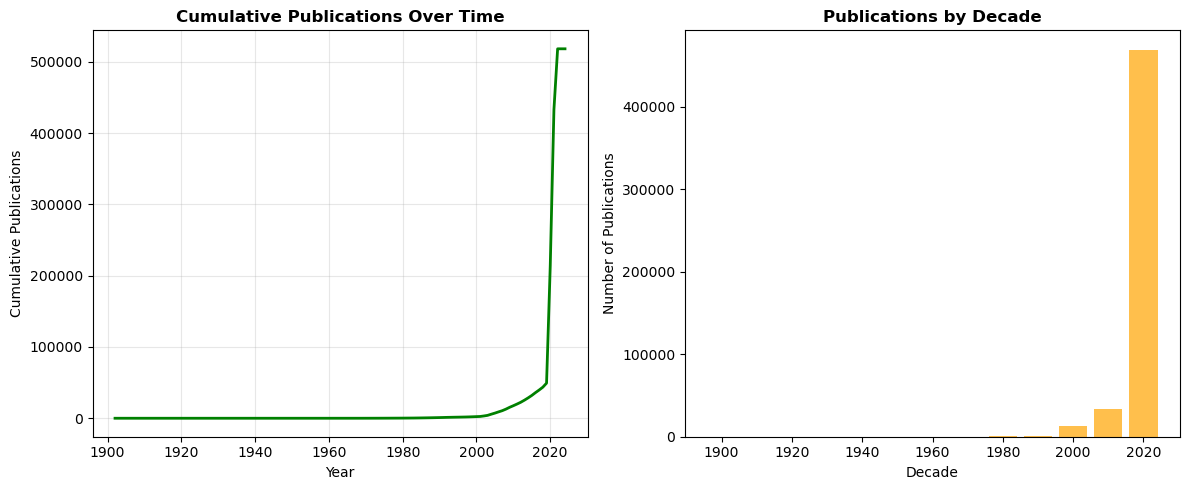


Abstract Length Analysis:


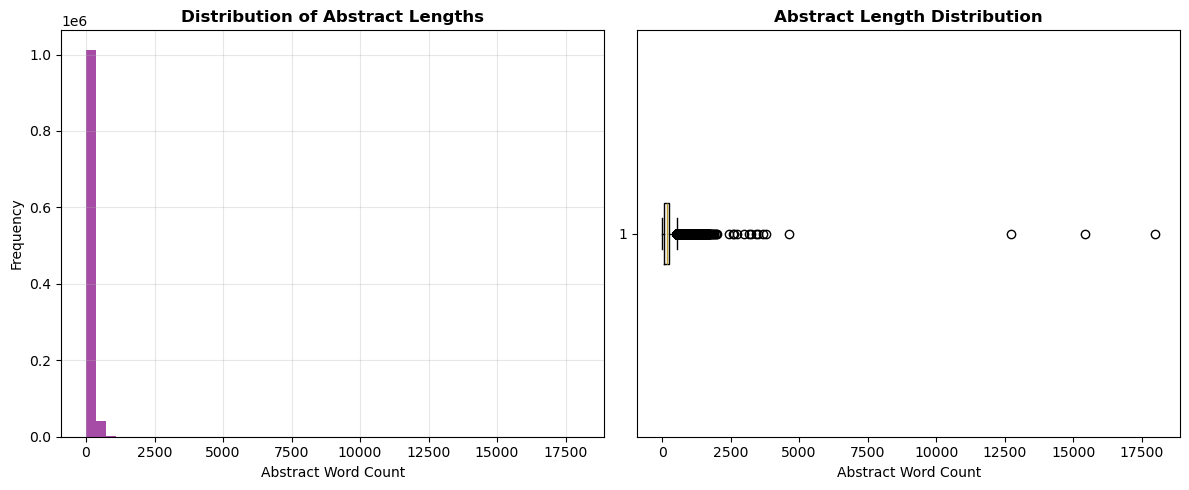

Abstract length statistics:
  Mean: 165.3 words
  Median: 179.0 words
  Max: 18000 words


In [66]:
print("\n" + "="*60)
print("STEP 3: Additional Analysis")
print("="*60)

# 3.1 Cumulative publications
if year_columns and year_col in df.columns:
    valid_years = df[df[year_col] > 1900][year_col].dropna()
    
    if len(valid_years) > 0:
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        yearly_cumulative = valid_years.value_counts().sort_index().cumsum()
        plt.plot(yearly_cumulative.index, yearly_cumulative.values, linewidth=2, color='green')
        plt.title('Cumulative Publications Over Time', fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Cumulative Publications')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        decades = (valid_years // 10) * 10
        decade_counts = decades.value_counts().sort_index()
        plt.bar(decade_counts.index, decade_counts.values, width=8, color='orange', alpha=0.7)
        plt.title('Publications by Decade', fontweight='bold')
        plt.xlabel('Decade')
        plt.ylabel('Number of Publications')
        
        plt.tight_layout()
        plt.show()

# 3.2 Abstract length analysis
if 'abstract_word_count' in df.columns:
    print("\nAbstract Length Analysis:")
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(df['abstract_word_count'], bins=50, alpha=0.7, color='purple')
    plt.xlabel('Abstract Word Count')
    plt.ylabel('Frequency')
    plt.title('Distribution of Abstract Lengths', fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.boxplot(df['abstract_word_count'].dropna(), vert=False)
    plt.xlabel('Abstract Word Count')
    plt.title('Abstract Length Distribution', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Abstract length statistics:")
    print(f"  Mean: {df['abstract_word_count'].mean():.1f} words")
    print(f"  Median: {df['abstract_word_count'].median():.1f} words")
    print(f"  Max: {df['abstract_word_count'].max()} words")

In [68]:
print("\n" + "="*60)
print("STEP 4: Summary Statistics")
print("="*60)

print(" DATASET SUMMARY:")
print(f"Total papers: {len(df):,}")

if year_columns and year_col in df.columns:
    valid_years = df[year_col].dropna()
    if len(valid_years) > 0:
        print(f"Time span: {int(valid_years.min())} - {int(valid_years.max())}")
        print(f"Most productive year: {int(valid_years.mode()[0])} ({valid_years.value_counts().max():,} papers)")

if journal_columns and journal_col in df.columns:
    print(f"Unique journals/sources: {df[journal_col].nunique():,}")
    print(f"Top journal: '{df[journal_col].mode()[0]}' ({df[journal_col].value_counts().max():,} papers)")

if 'title' in df.columns:
    print(f"Average title length: {df['title'].str.len().mean():.1f} characters")

print("ANALYSIS COMPLETED SUCCESSFULLY!")


STEP 4: Summary Statistics
 DATASET SUMMARY:
Total papers: 1,054,343
Time span: 1856 - 2024
Most productive year: 2021 (219,335 papers)
Unique journals/sources: 49
Top journal: 'WHO' (448,645 papers)
Average title length: 99.1 characters
ANALYSIS COMPLETED SUCCESSFULLY!
